# Portfolio Link

In [1]:
%%html
<a href="http://hkbtotw.thddns.net:8880">Investment Portfolio Monitoring</a>

# Benchmark Technical Analysis

In [2]:
from TechnicalCalculation import *
# Import initial libraries
from Operations_3 import *
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

warnings.filterwarnings("ignore")

### Read data from Google Sheet
readSheet=ReadSheet()
sheetBList=readSheet.Authorization_Benchmark()
sheetSList=readSheet.Authorization_Benchmark_Scaped()

del sheetBList[len(sheetBList)-1], BenchmarkList[len(BenchmarkList)-1]

dBList=[]
for n in sheetBList:
    dfIn=readSheet.LoadSheet(n)
    dBList.append(dfIn)

dSList=[]
for n in sheetSList:
    dfIn=readSheet.LoadSheet(n)
    dSList.append(dfIn)
   
    
bDict=dict(zip(BenchmarkList,dBList))
sDict=dict(zip(BenchmarkScrapeList,dSList))

del sheetBList, sheetSList 

C:\Users\70018928\AppData\Local\Continuum\anaconda3\envs\quandl\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


-------------  CSI300  //////////////////////


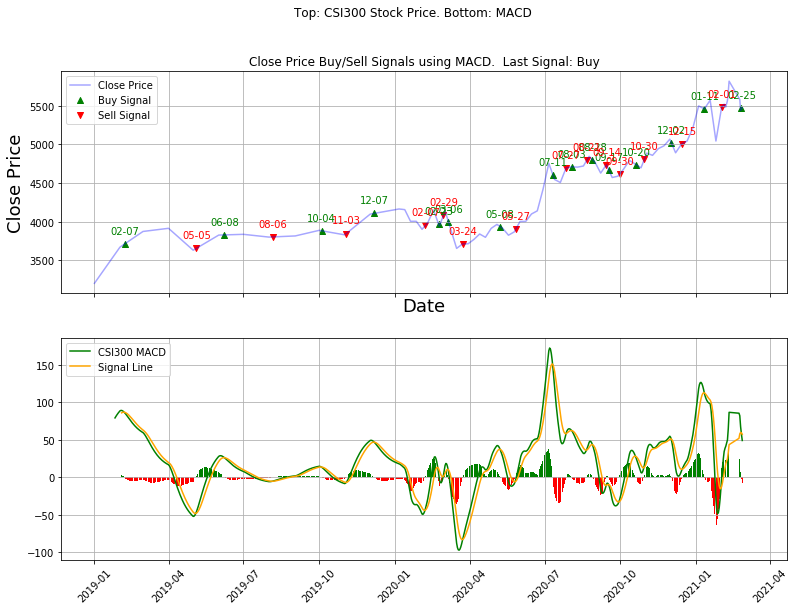

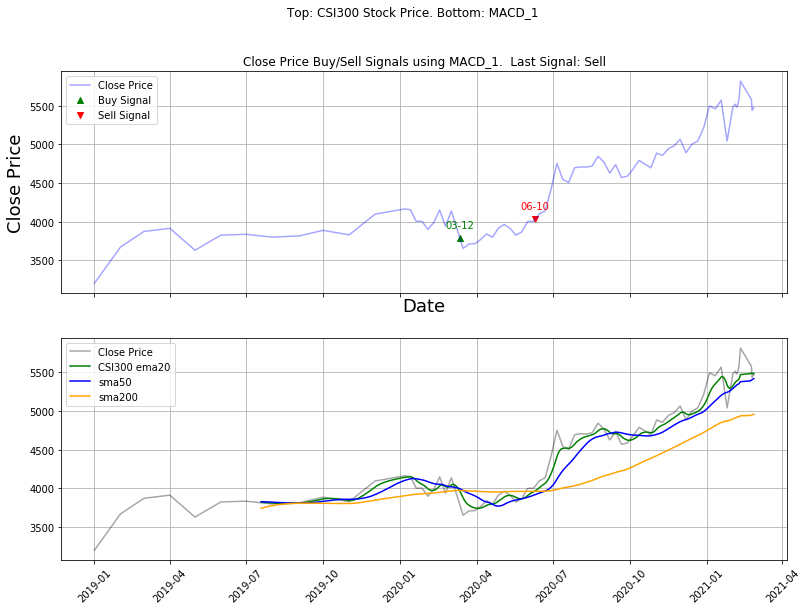

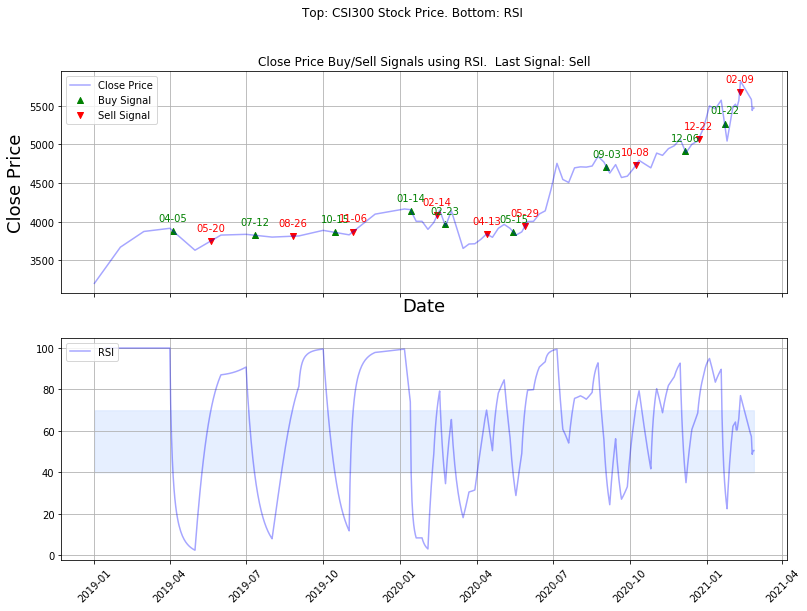

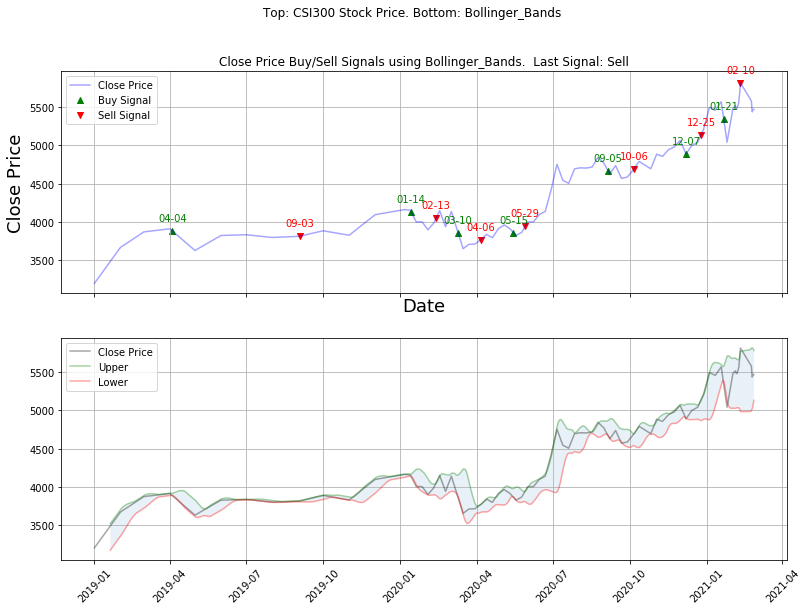

-------------  SP500  //////////////////////


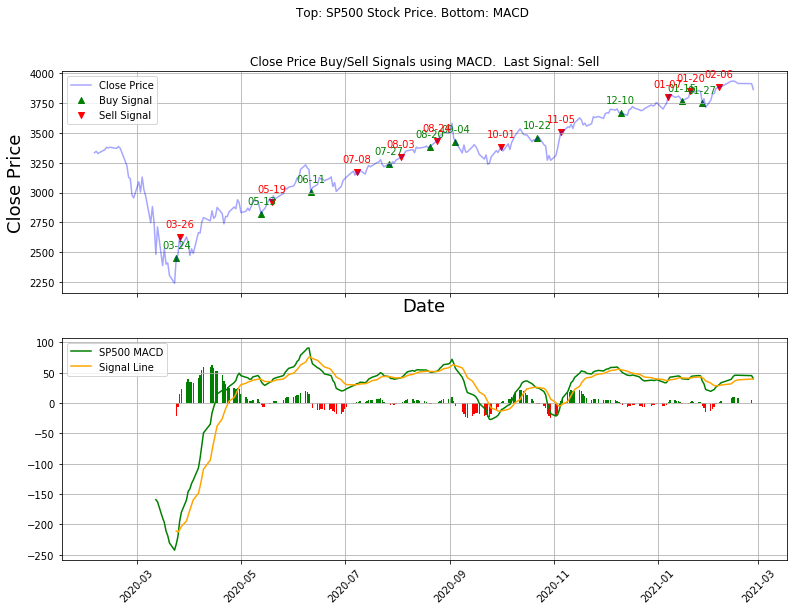

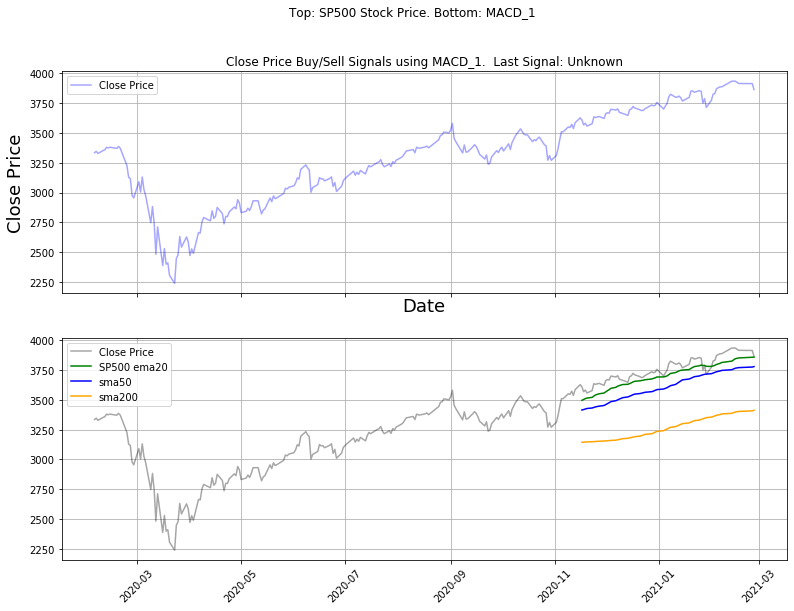

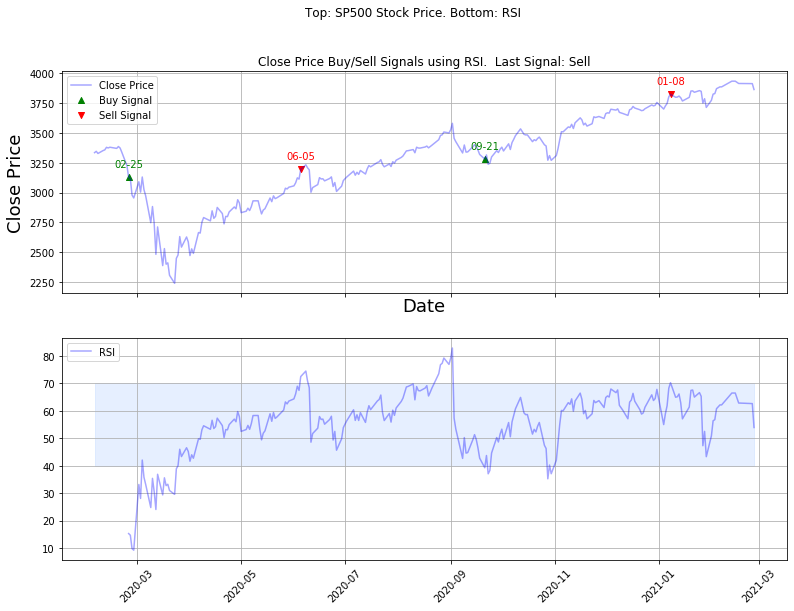

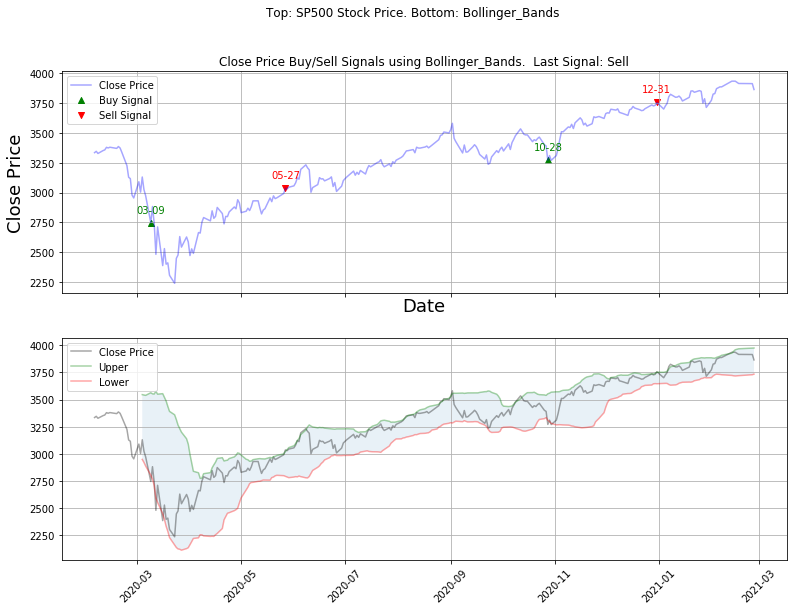

-------------  MSCIW  //////////////////////


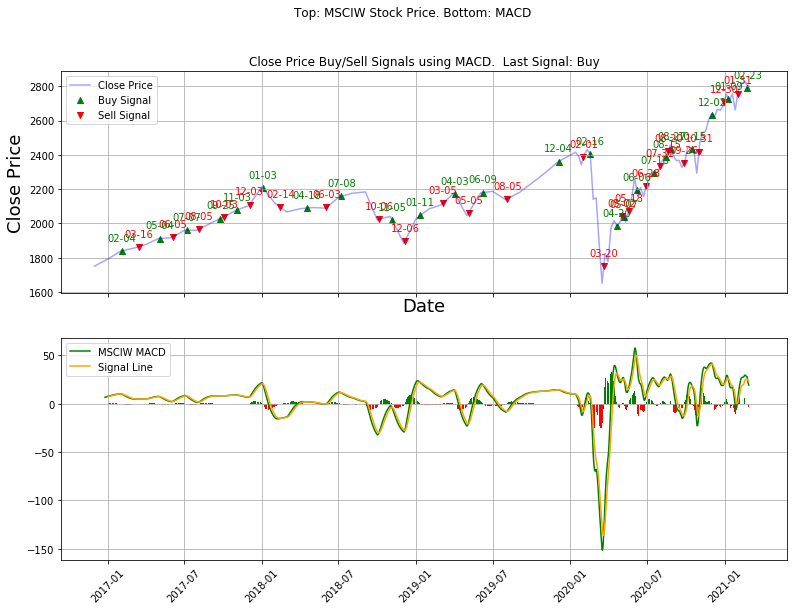

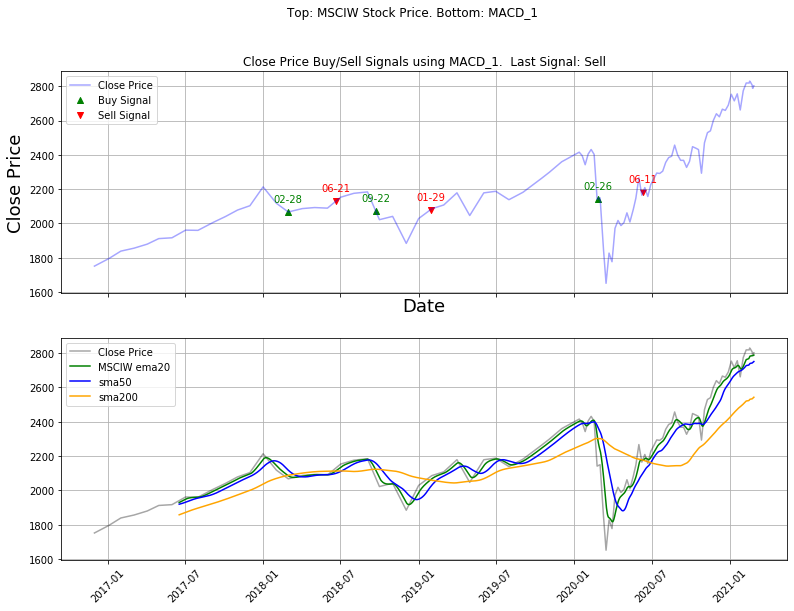

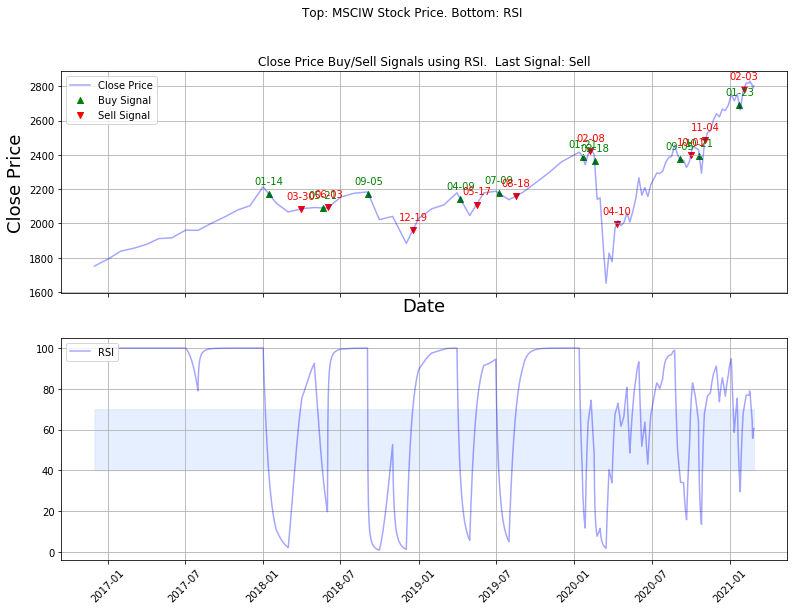

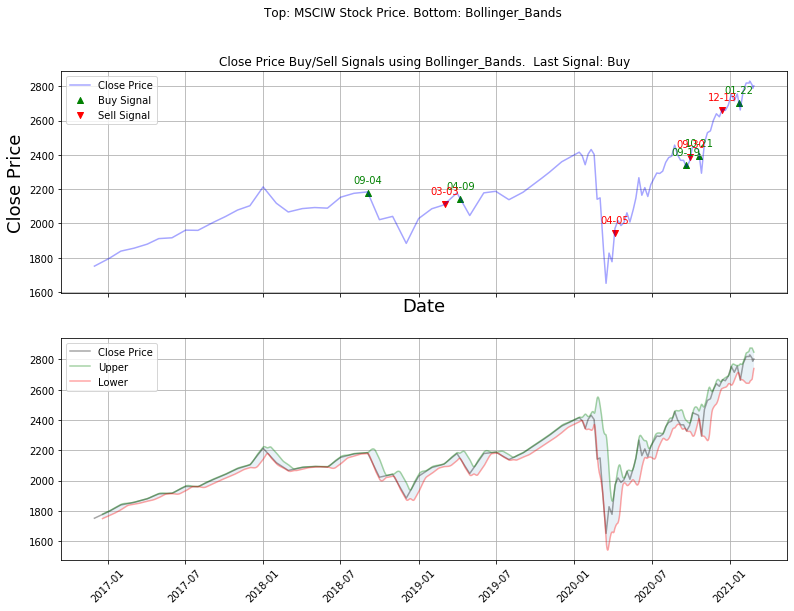

In [3]:
for fundName in BenchmarkList:
    #fundName='TMBCOF'
    print('------------- ', fundName, ' //////////////////////')
    dfIn=bDict[fundName]

    #dfIn=pd.read_csv("C:/Users/70018928/Downloads/Fund_History_kfviet_20210208_v2.0.0.csv", parse_dates=["Date"])
    dfIn=dfIn.set_index(['Date'])

    # Load data to model
    company=Company(fundName,dfIn, 'Price')
    config={}

    # #Compute all indicators
    set_technical_indicators(config, company)

    plot_macd(company)
    plot_macd_2(company)
    plot_rsi(company)
    # Bollinger band : Buy when the close price crosses the lower band and Sell when the close price crosses the upper band line
    plot_bollinger_bands(company)
    plt.show()
    
del dfIn

for fundName in BenchmarkScrapeList:
    #fundName='TMBCOF'
    print('------------- ', fundName, ' //////////////////////')
    dfIn=sDict[fundName]

    #dfIn=pd.read_csv("C:/Users/70018928/Downloads/Fund_History_kfviet_20210208_v2.0.0.csv", parse_dates=["Date"])
    dfIn=dfIn.set_index(['Date'])

    # Load data to model
    company=Company(fundName,dfIn, 'Price')
    config={}

    # #Compute all indicators
    set_technical_indicators(config, company)

    plot_macd(company)
    plot_macd_2(company)
    plot_rsi(company)
    # Bollinger band : Buy when the close price crosses the lower band and Sell when the close price crosses the upper band line
    plot_bollinger_bands(company)
    plt.show()
    
del dfIn

-------------  CSI300  //////////////////////
 Max Drawdown (%) :  Price   -12.24929
dtype: float64  at  Price   2020-03-16
dtype: datetime64[ns]


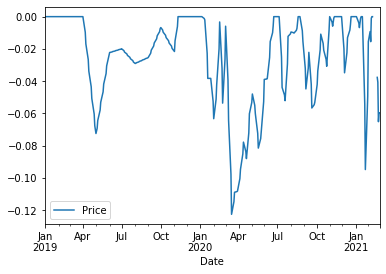

-------------  SP500  //////////////////////
 Max Drawdown (%) :  Price   -33.924959
dtype: float64  at  Price   2020-03-23
dtype: datetime64[ns]


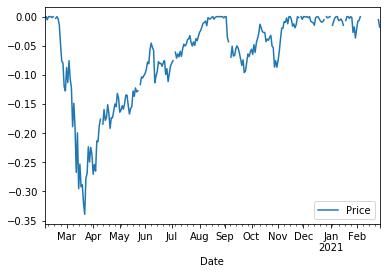

-------------  MSCIW  //////////////////////
 Max Drawdown (%) :  Price   -32.098364
dtype: float64  at  Price   2020-03-16
dtype: datetime64[ns]


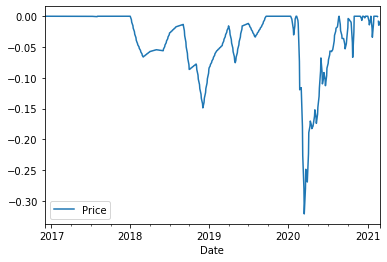

In [4]:
# Max Drawdown Calculation

for fundName in BenchmarkList:
    #fundName='TMBCOF'
    print('------------- ', fundName, ' //////////////////////')
    dfIn=bDict[fundName]

    dfIn=dfIn.set_index(['Date'])

    dfIn=dfIn.asfreq('B')  # 'B' picks only Business day from Dataframe

    dfCalc=dfIn[['Price']]
    previous_peak=dfCalc.cummax()
    drawdown=(dfCalc-previous_peak)/previous_peak
    
    print(' Max Drawdown (%) : ',drawdown.min()*100,' at ',drawdown.idxmin())

    drawdown.plot()
    plt.show()
    
for fundName in BenchmarkScrapeList:
    #fundName='TMBCOF'
    print('------------- ', fundName, ' //////////////////////')
    dfIn=sDict[fundName]

    dfIn=dfIn.set_index(['Date'])

    dfIn=dfIn.asfreq('B')  # 'B' picks only Business day from Dataframe

    dfCalc=dfIn[['Price']]
    previous_peak=dfCalc.cummax()
    drawdown=(dfCalc-previous_peak)/previous_peak
    
    print(' Max Drawdown (%) : ',drawdown.min()*100,' at ',drawdown.idxmin())

    drawdown.plot()
    plt.show()